In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [30]:
iris = datasets.load_iris()
x_values=iris.data[:,0]
y=iris.target
print(x_values)
print(y)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


(600, 1)


In [35]:

x=x_values.reshape(150,1)
print(x.shape)
print(x)

(150, 1)
[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.25,random_state=1)
print("---------------x_train----------------")
print(x_train)
print("---------------x_test----------------")
print(x_test)
print("---------------y_train----------------")
print(y_train)
print("---------------y_test----------------")
print(y_test)

---------------x_train----------------
[[5.1]
 [5.9]
 [4.6]
 [5.8]
 [4.8]
 [6.5]
 [4.9]
 [4.6]
 [6.4]
 [4.3]
 [5.6]
 [4.4]
 [5.5]
 [5. ]
 [5.1]
 [4.9]
 [4.9]
 [4.6]
 [5.9]
 [6.1]
 [5. ]
 [6.7]
 [5.7]
 [6.2]
 [7. ]
 [5.8]
 [5.4]
 [5. ]
 [6.1]
 [6.1]
 [7.2]
 [5.7]
 [6.3]
 [6.4]
 [6.3]
 [6.7]
 [4.9]]
---------------x_test----------------
[[5.8]
 [5.1]
 [6.6]
 [5.4]
 [7.9]
 [6.3]
 [6.9]
 [5.1]
 [4.7]
 [6.9]
 [5.6]
 [5.4]
 [7.1]
 [6.4]
 [6. ]
 [4.4]
 [5.8]
 [5.6]
 [5.4]
 [5. ]
 [5.5]
 [5.4]
 [6.7]
 [5. ]
 [7.2]
 [5.7]
 [5.5]
 [5.1]
 [6.1]
 [6.3]
 [6.1]
 [7.7]
 [5.6]
 [6.4]
 [5.8]
 [5.3]
 [5.5]
 [5.2]
 [6.5]
 [6.7]
 [6.8]
 [5.1]
 [6. ]
 [6.3]
 [6.6]
 [7.7]
 [5.7]
 [5. ]
 [4.8]
 [5.2]
 [5.1]
 [5.5]
 [7.7]
 [6.9]
 [7.3]
 [6.4]
 [6.2]
 [6. ]
 [7.7]
 [5.7]
 [4.8]
 [5.7]
 [6.3]
 [4.8]
 [4.7]
 [6.5]
 [4.6]
 [6.1]
 [6.5]
 [6.7]
 [5.7]
 [6.7]
 [6. ]
 [5.1]
 [6. ]
 [6.4]
 [6.5]
 [5. ]
 [6.3]
 [5.5]
 [5.4]
 [4.9]
 [5.2]
 [6.7]
 [4.4]
 [6. ]
 [6.4]
 [5.9]
 [5.2]
 [5.1]
 [5.8]
 [4.9]
 [7.4]
 [6.2]
 [7.6

In [40]:
sl_reg = LinearRegression ()
sl_reg.fit(x_train,y_train)
y_predict = sl_reg.predict(x_test)
print("-----------------------Test Class-----------------\n",y_test)
print("\n---------------------------Predict Class-----------\n",y_predict)

-----------------------Test Class-----------------
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0]

---------------------------Predict Class-----------
 [1.06394396 0.54225667 1.660158   0.76583694 2.62900581 1.43657773
 1.88373826 0.54225667 0.24414965 1.88373826 0.91489045 0.76583694
 2.03279177 1.51110449 1.21299747 0.02056938 1.06394396 0.91489045
 0.76583694 0.46772992 0.84036369 0.76583694 1.73468475 0.46772992
 2.10731853 0.9894172  0.84036369 0.54225667 1.28752422 1.43657773
 1.28752422 2.4799523  0.91489045 1.51110449 1.06394396 0.69131018
 0.84036369 0.61678343 1.58563124 1.73468475 1.80921151 0.54225667
 1.21299747 1.43657773 1.660158   2.4799523  0.9894172  0.46772992
 0.3186764  0.61678343 0.54225667 0.84036369 2.4799523  1.88373826
 2.18184528 1.51110449 1.36205098 1.21299747 2.4799523  0.98

In [41]:
print(sl_reg.coef_)
print(sl_reg.intercept_)

[0.74526755]
-3.2586078402146366


Text(0, 0.5, 'sepal length')

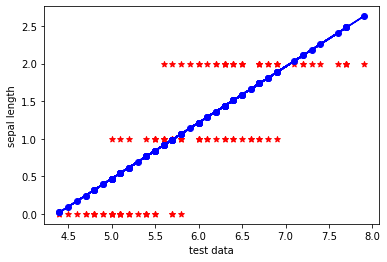

In [44]:
plt.scatter(x_test,y_test,marker='*',color='red')
plt.plot(x_test,y_predict,marker='o',color='blue')
plt.xlabel('test data')
plt.ylabel('sepal length')

In [45]:
print(mean_squared_error(y_test,y_predict))

0.2616224853405016


In [46]:
print(r2_score(y_test,y_predict))

0.6156629641839778
